In [131]:
# Dependencies
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from datetime import datetime, timedelta


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import inspect
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [38]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = []
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()


In [45]:
#  3. Convert the June temperatures to a list.
june_temps=list(june_temps)

In [46]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=['date','temperature'])

In [47]:
june_temps_df

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [48]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [49]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = []
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [50]:
# 7. Convert the December temperatures to a list.
dec_temps=list(dec_temps)

In [54]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['date','temperature'])
dec_temps_df

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [55]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Extra work

In [61]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [62]:
# Get the column names for the table
column_names = inspector.get_columns('measurement')
for column_name in column_names:
    print(column_name["name"])

id
station
date
prcp
tobs


In [63]:
# Get the column names for the table
column_names = inspector.get_columns('station')
for column_name in column_names:
    print(column_name["name"])

id
station
name
latitude
longitude
elevation


In [64]:
#Get precipiation data for the month of June, make a datafram and grab summary statistics
june_prcp = []
june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
june_prcp_df = pd.DataFrame(june_prcp, columns=['date','temperature'])
june_prcp_df.describe()

,temperature
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [65]:
#Get precipiation data for the month of December, make a datafram and grab summary statistics
dec_prcp = []
dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
dec_prcp_df = pd.DataFrame(dec_prcp, columns=['date','temperature'])
dec_prcp_df.describe()

,temperature
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


## Plots

<AxesSubplot:ylabel='Frequency'>

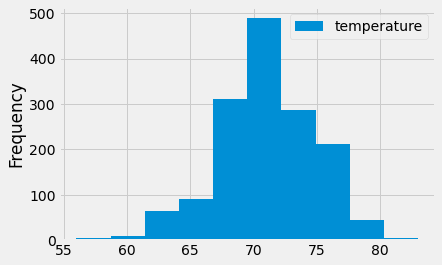

In [66]:
dec_temps_df.plot.hist(bins=10)

<AxesSubplot:xlabel='date', ylabel='Temperature'>

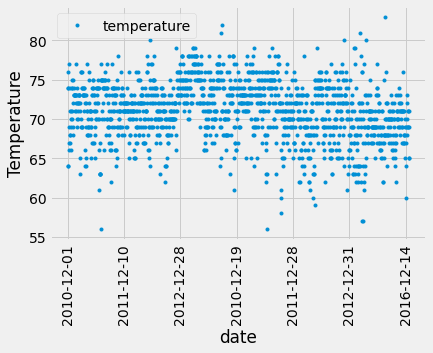

In [136]:
dec_temps_df.set_index(dec_temps_df.date, inplace=True)
dec_temps_df.plot(rot=90, 
                  style=".",
                  ylabel = 'Temperature'
                  
                 )


In [155]:
dec_temps_df.reset_index(drop=True)

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [158]:
dec_temps_df.date = pd.Index(pd.to_datetime(dec_temps_df.date))

In [162]:
mean_temps_dec = dec_temps_df.groupby(pd.Grouper(key='date', freq='1Y')).mean()

<AxesSubplot:xlabel='date', ylabel='Average Temperature'>

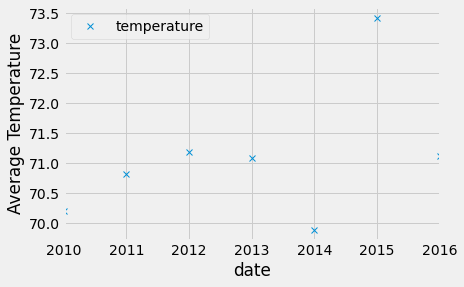

In [178]:
mean_temps_dec.plot(style="x",
                  ylabel = 'Average Temperature'
)

In [180]:
dec_temps_df.dtypes

date           datetime64[ns]
temperature           float64
dtype: object

In [ ]:
dec_temps_df.year = dec
# # date in MM-DD-YYYY format
# df['Birthday2'] = df['Birthday'].dt.strftime('%m-%d-%Y')
# # display the dataframe
# print(df)